In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error


os.chdir("C:/Users/Penny/Documents/魯汶/下學期/進階大數據分析/hw/hw1/advancedanalytics/assignment1")

In [2]:
penny_train = pd.read_csv('peiling_train.csv')
penny_test = pd.read_csv('peiling_test.csv')

In [10]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df_train = pd.DataFrame(encoder.fit_transform(penny_train[['language']]).toarray())
encoder_df_test = pd.DataFrame(encoder.fit_transform(penny_test[['language']]).toarray())
encoder_df_train.columns = ['Dutch','English','French','Germany']
encoder_df_test.columns = ['Dutch','English','French','Germany']

#merge one-hot encoded columns back with original DataFrame
final_df_train = penny_train.join(encoder_df_train).drop(["language"], axis = 1)
final_df_test = penny_test.join(encoder_df_test).drop(["language"], axis = 1)

In [19]:
for i in ['Dutch','English','French','Germany']:
    final_df_train[i] = final_df_train[i].astype(bool)
    final_df_test[i] = final_df_test[i].astype(bool)

In [20]:
final_df_train.to_csv('peiling_train.csv', header = True) 
final_df_test.to_csv('peiling_test.csv', header = True) 

In [17]:
final_df_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6495 entries, 0 to 6494
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   property_id  6495 non-null   int64 
 1   Dutch        6495 non-null   object
 2   English      6495 non-null   object
 3   French       6495 non-null   object
 4   Germany      6495 non-null   object
dtypes: int64(1), object(4)
memory usage: 253.8+ KB


In [45]:



# =============================================================================
# load datasets
# =============================================================================

combine_train = pd.read_csv('combine_train.csv', index_col=("property_id"))
traget = pd.read_csv('train.csv', index_col=("property_id"))["target"]

combine_test  = pd.read_csv('combine_test.csv', index_col=("property_id"))

x_train, x_test, y_train, y_test = train_test_split(combine_train, traget, test_size=0.15)

problem_feature = ['Unnamed: 0', "language", "scraped_at", "scraped_minus_review", "host_since"
                       , "host_response_time", "host_response_rate", "host_nr_listings", "host_nr_listings_total",
                  'translationmissing:en.hosting_amenity_49', 'translationmissing:en.hosting_amenity_50']

x_train = x_train.drop(problem_feature, axis = 1)
x_test = x_test.drop(problem_feature, axis = 1)




C:\Users\Penny\AppData\Local\Temp\ipykernel_8636\507228854.py:17: DtypeWarning: Columns (127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  combine_train = pd.read_csv('combine_train.csv', index_col=("property_id"))


In [41]:
features = pd.read_csv('train.csv', index_col=("property_id")).drop(["target"], axis = 1)
traget = pd.read_csv('train.csv', index_col=("property_id"))["target"]
x_train, x_test, y_train, y_test = train_test_split(features, traget, test_size=0.15)

problem_feature = ["property_name", "property_summary", "property_space", "property_desc", "property_neighborhood", 
                   "property_notes", "property_transit", "property_access", "property_interaction", "property_rules",
                   "property_zipcode", "property_type", "property_room_type", "property_bed_type", "property_amenities", 
                   "property_scraped_at", "property_last_updated", "host_since", "host_location", "host_about", 
                   "host_response_time", "host_verified", "booking_cancel_policy", "reviews_first", "reviews_last", "extra"]

x_train = x_train.drop(problem_feature, axis = 1)
x_test = x_test.drop(problem_feature, axis = 1)

In [46]:

# =============================================================================
# models
# =============================================================================

# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}



lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)


In [15]:
x_train.columns.tolist()

['Unnamed: 0',
 'property_type',
 'property_room_type',
 'property_max_guests',
 'property_bathrooms',
 'property_bedrooms',
 'cluster_label',
 'centroid_distance',
 'beds',
 'Airbed',
 'Couch',
 'Futon',
 'Pull-out Sofa',
 'Real Bed',
 '24-hourcheck-in',
 'accessible-heightbed',
 'airconditioning',
 'babybath',
 'babymonitor',
 'babysitterrecommendations',
 'bathtub',
 'bbqgrill',
 'beachessentials',
 'bedlinens',
 'breakfast',
 'buzzer/wirelessintercom',
 'cabletv',
 'carbonmonoxidedetector',
 'cat(s)',
 'changingtable',
 'children’sbooksandtoys',
 'children’sdinnerware',
 'cleaningbeforecheckout',
 'coffeemaker',
 'cookingbasics',
 'crib',
 'disabledparkingspot',
 'dishesandsilverware',
 'dishwasher',
 'dog(s)',
 'doorman',
 'doormanentry',
 'dryer',
 'elevatorinbuilding',
 'essentials',
 'ethernetconnection',
 'extrapillowsandblankets',
 'family/kidfriendly',
 'fireextinguisher',
 'fireplaceguards',
 'firmmatress',
 'firstaidkit',
 'flatsmoothpathwaytofrontdoor',
 'freeparkingonpre

In [47]:

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)



[LightGBM] [Warning] Unknown parameter: learnnig_rage
[1]	valid_0's l1: 31.337	valid_0's l2: 2701.93
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 31.3091	valid_0's l2: 2701.03
[3]	valid_0's l1: 31.3221	valid_0's l2: 2701.36
[4]	valid_0's l1: 31.3263	valid_0's l2: 2702.79
[5]	valid_0's l1: 31.3493	valid_0's l2: 2704.48
[6]	valid_0's l1: 31.3516	valid_0's l2: 2705.93
[7]	valid_0's l1: 31.3771	valid_0's l2: 2707.28
[8]	valid_0's l1: 31.391	valid_0's l2: 2707.01
[9]	valid_0's l1: 31.4152	valid_0's l2: 2708.51
[10]	valid_0's l1: 31.4453	valid_0's l2: 2712.06
[11]	valid_0's l1: 31.4456	valid_0's l2: 2713.04
[12]	valid_0's l1: 31.4575	valid_0's l2: 2711.96
[13]	valid_0's l1: 31.4803	valid_0's l2: 2713.51
[14]	valid_0's l1: 31.4991	valid_0's l2: 2715.66
[15]	valid_0's l1: 31.5258	valid_0's l2: 2715.42
[16]	valid_0's l1: 31.5321	valid_0's l2: 2718.18
[17]	valid_0's l1: 31.5875	valid_0's l2: 2723.63
[18]	valid_0's l1: 31.6032	valid_0's l2: 2723.44
[19]	valid_0's

C:\Users\Penny\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [48]:
# prediction
y_pred = model.predict(x_test)

# accuracy check
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 2701.03
RMSE: 51.97


In [37]:
y_pred


array([67.48402704, 67.48402704, 67.4123409 , 68.43182228, 67.48402704,
       68.43182228, 67.51026164, 67.51026164, 67.51026164, 67.51026164,
       68.43182228, 67.51026164, 67.48402704, 67.48402704, 67.51026164,
       67.48402704, 67.48402704, 67.48402704, 67.51026164, 68.43182228,
       67.48402704, 67.51026164, 67.48402704, 67.4123409 , 67.51026164,
       67.51026164, 67.75100594, 67.48402704, 67.51026164, 67.51026164,
       67.51026164, 67.75100594, 67.51026164, 67.4123409 , 67.51026164,
       67.48402704, 68.43182228, 67.48402704, 67.48402704, 67.4123409 ,
       67.48402704, 67.51026164, 67.4123409 , 67.48402704, 67.51026164,
       67.51026164, 67.48402704, 67.48402704, 67.4123409 , 67.48402704,
       67.48402704, 67.51026164, 67.48402704, 67.4123409 , 68.43182228,
       67.48402704, 67.4123409 , 68.43182228, 67.51026164, 68.43182228,
       67.48402704, 68.43182228, 67.48402704, 68.71753655, 67.75100594,
       67.51026164, 68.43182228, 67.4123409 , 67.48402704, 67.41

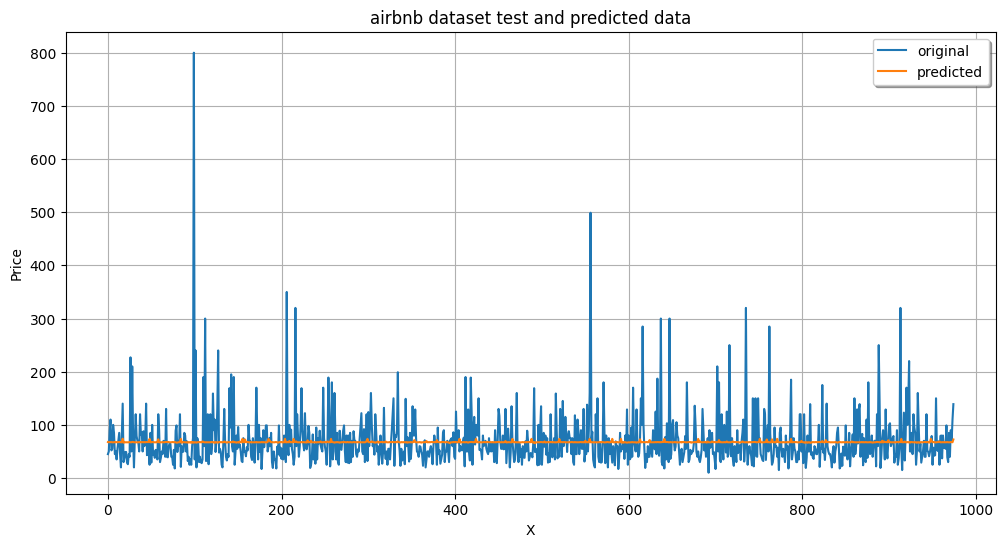

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

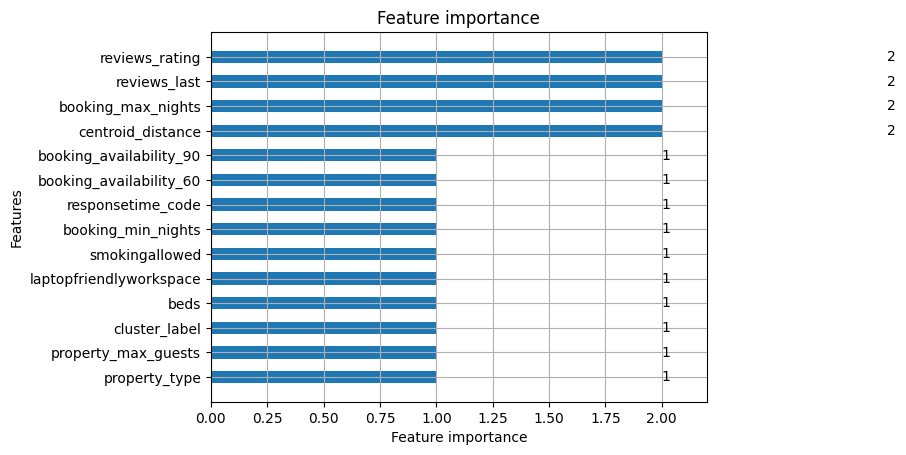

In [49]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("airbnb dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()  

# plotting feature importance
lgb.plot_importance(model, height=.5) 